In [1]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [2]:
# Define lists of states, colors, linestyles, month order, day_order, and hour_order
state_lst=['NJ','PA','NY']
state_lst_full=['New Jersey','Pennsylvania','New York']
color_lst=['r','b','k']
linestyle_lst=['dashed','dashdot','solid']
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)

In [14]:
# read the survey results, slice the states of interests, and display the first 5 rows
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_US_Accidents/US_Accidents_Dec20_updated.csv')
df = df[df.State.isin(state_lst)]
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
39,A-2716639,2,2016-02-09 11:28:49,2016-02-09 17:28:49,40.522250,-80.066660,40.528300,-80.071880,0.500,At Camp Horne Rd/Exit 15 - Accident.,NaN,I-279 N,R,Pittsburgh,Allegheny,PA,15237,US,US/Eastern,KPIT,2016-02-09 11:12:00,30.0,20.0,88.0,29.56,1.5,West,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
40,A-2716640,2,2016-02-09 12:31:08,2016-02-09 18:31:08,40.487814,-80.009439,40.486140,-80.009008,0.118,At Venture St/Exit 10 - Accident.,NaN,US-19 Trk S,R,Pittsburgh,Allegheny,PA,15214,US,US/Eastern,KAGC,2016-02-09 12:53:00,28.9,18.2,82.0,29.61,1.0,SW,13.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
52,A-2716652,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
64,A-2716664,2,2016-02-10 10:21:52,2016-02-10 16:21:52,41.851914,-80.175232,41.858231,-80.176444,0.441,At US-6/Exit 166 - Accident.,NaN,I-79 N,R,Edinboro,Erie,PA,16412,US,US/Eastern,KERI,2016-02-10 10:16:00,24.1,12.5,77.0,29.72,0.8,West,12.7,0.04,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
77,A-2716677,4,2016-02-10 16:06:41,2016-02-10 22:06:41,40.109653,-80.202900,40.020034,-80.175188,6.363,Closed between US-19/Exit 30 and Ten Mile Rd/E...,NaN,I-79 S,R,Washington,Washington,PA,15301,US,US/Eastern,KAFJ,2016-02-10 16:15:00,19.4,6.6,74.0,29.84,3.0,SW,12.7,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
# Extract year, month, day, hour, & weekday information

# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

# Check the dataframe
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
39,A-2716639,2,2016-02-09 11:28:49,2016-02-09 17:28:49,40.522250,-80.066660,40.528300,-80.071880,0.500,At Camp Horne Rd/Exit 15 - Accident.,NaN,I-279 N,R,Pittsburgh,Allegheny,PA,15237,US,US/Eastern,KPIT,2016-02-09 11:12:00,30.0,20.0,88.0,29.56,1.5,West,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Feb,9,11,Tue,360.0
40,A-2716640,2,2016-02-09 12:31:08,2016-02-09 18:31:08,40.487814,-80.009439,40.486140,-80.009008,0.118,At Venture St/Exit 10 - Accident.,NaN,US-19 Trk S,R,Pittsburgh,Allegheny,PA,15214,US,US/Eastern,KAGC,2016-02-09 12:53:00,28.9,18.2,82.0,29.61,1.0,SW,13.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Feb,9,12,Tue,360.0
52,A-2716652,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Feb,10,8,Wed,360.0
64,A-2716664,2,2016-02-10 10:21:52,2016-02-10 16:21:52,41.851914,-80.175232,41.858231,-80.176444,0.441,At US-6/Exit 166 - Accident.,NaN,I-79 N,R,Edinboro,Erie,PA,16412,US,US/Eastern,KERI,2016-02-10 10:16:00,24.1,12.5,77.0,29.72,0.8,West,12.7,0.04,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Feb,10,10,Wed,360.0
77,A-2716677,4,2016-02-10 16:06:41,2016-02-10 22:06:41,40.109653,-80.202900,40.020034,-80.175188,6.363,Closed between US-19/Exit 30 and Ten Mile Rd/E...,NaN,I-79 S,R,Washington,Washington,PA,15301,US,US/Eastern,KAFJ,2016-02-10 16:15:00,19.4,6.6,74.0,29.84,3.0,SW,12.7,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Feb,10,16,Wed,360.0


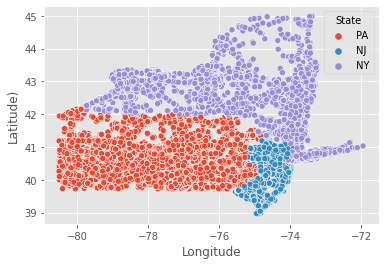

In [16]:
# Visualization: map of accidents by state
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [17]:
# Check the beginning and end date of this dataset
print('This dataset contains data beween {} and {}.'.format(df.Start_Time.min(),df.Start_Time.max()))

This dataset contains data beween 2016-02-09 11:28:49 and 2020-12-31 22:37:02.


In [21]:
# Find out how many unique days in the dataset
allday_lst=df.Start_Time.astype(str).str.split(' ')
allday_lst2=[item[0] for item in allday_lst]

print('For the three states of New Jersey, Pennsylvania, & New York in this dataset:')
print('There are {} total accidents.'.format(df.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))

For the three states of New Jersey, Pennsylvania, & New York in this dataset:
There are 133668 total accidents.
There are 133668 total days.
There are 1685 unique days.
On average, there are 79 accidents per day.


In [22]:
# For each state, find out how many unique days for each weekday/weekend

# Initialize an empty list to hold the number of days for each weekday/weekend for the three states
weekday_num_state=[]

# Run a for loop for the list of states: NJ, PA, & NY
for state in state_lst:
    
    # Initialize an empty list to hold the number of days for each weekday
    weekday_num=[]
    
    # Run a for loop for the whole week
    for weekday in weekday_lst:
        
        # Slice the dataframe for specific state & weekday
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        # Extract the first item which is the day information
        day_lst2=[item[0] for item in day_lst1]
        
        # Append the day into the list weekday_num
        weekday_num.append(len(set(day_lst2)))

    # Append the day with state information encoded into the list weekday_num_state
    weekday_num_state.append(weekday_num)

print('For the states of {}, here is the list of numbers of weekdays (Mon-Sun): {}.'.format(state_lst,weekday_num_state))

For the states of ['NJ', 'PA', 'NY'], here is the list of numbers of weekdays (Mon-Sun): [[232, 233, 233, 232, 230, 206, 210], [220, 225, 225, 222, 216, 188, 195], [235, 236, 237, 239, 235, 219, 226]].


In [23]:
# Run a for loop for each state to find out the percentage of days with accidents during this period of time in the data set
day_pct_lst=[]
for i,state in enumerate(state_lst):
    day_pct=[round(int(item1)/int(item2),2)*100 for item1,item2 in zip(weekday_num_state[i],calendar_weekday_num)]
    day_pct_lst.append(day_pct)
    print('For the state of {}, the percentage of days with accident during this period in the data set: {}%.'.format(state_lst[i], day_pct))

print(day_pct_lst)

For the state of NJ, the percentage of days with accident during this period in the data set: []%.
For the state of PA, the percentage of days with accident during this period in the data set: []%.
For the state of NY, the percentage of days with accident during this period in the data set: []%.
[[], [], []]


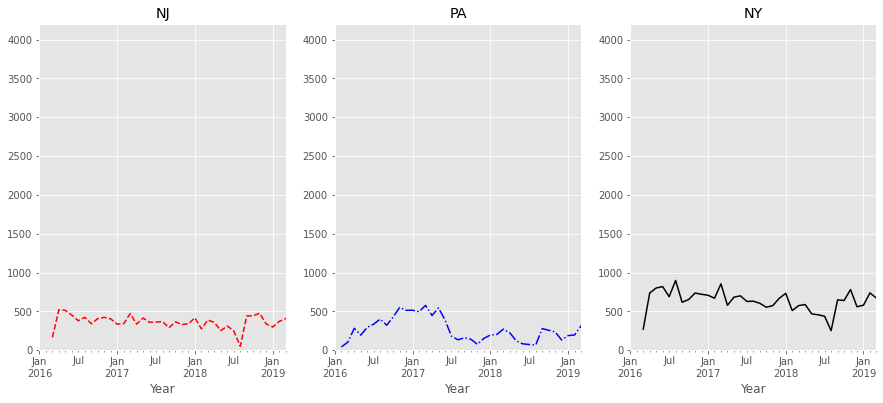

In [24]:
# Time series analysis, resample by month

# Set the start_time as the index for resampling purpose

df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    # Set the limits and labels
    plt.xlim('2016','2019-Mar')
    plt.ylim(0,4200)
    plt.xlabel('Year')
    plt.title('{}'.format(state))

plt.show()

# Reset the index back for further data analysis
df.reset_index(inplace=True)

In [25]:
df.Severity.value_counts().sort_values(ascending=False)

2    99132
4    17700
3    15882
1      954
Name: Severity, dtype: int64

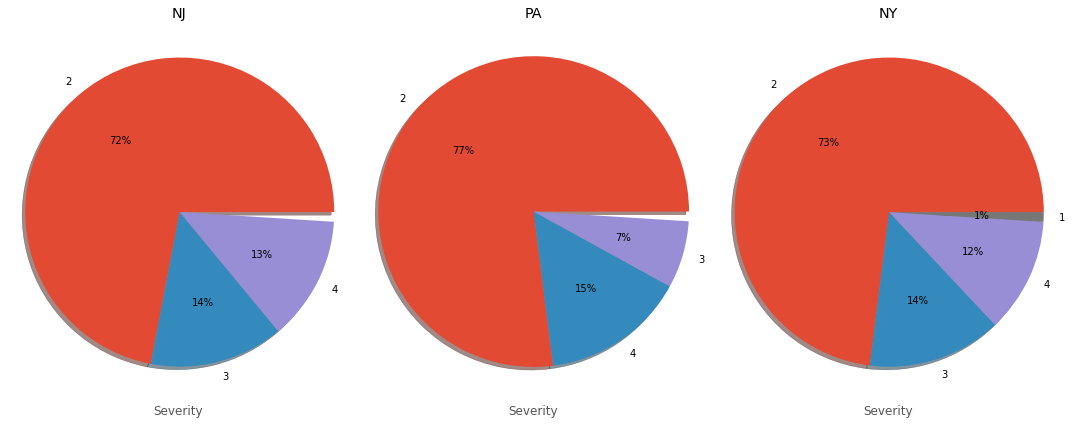

In [26]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

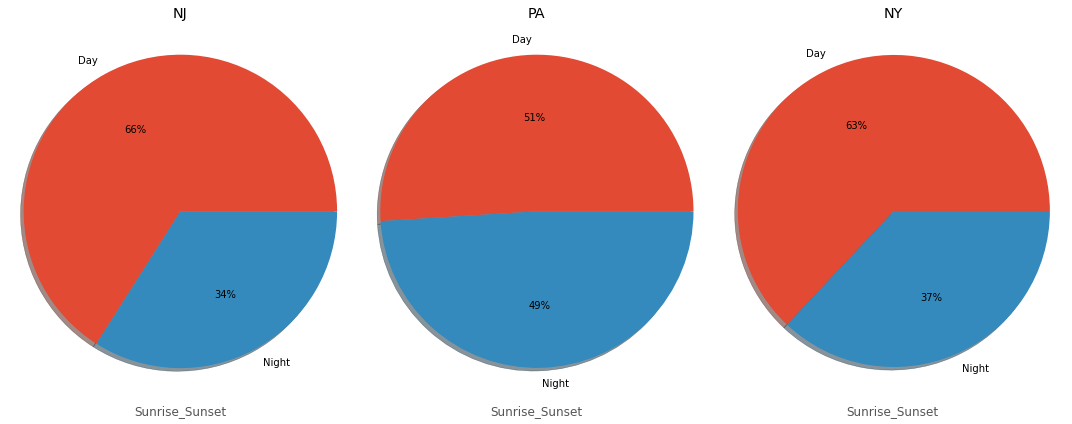

In [32]:
# The day or night when accidents occurred for each state
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

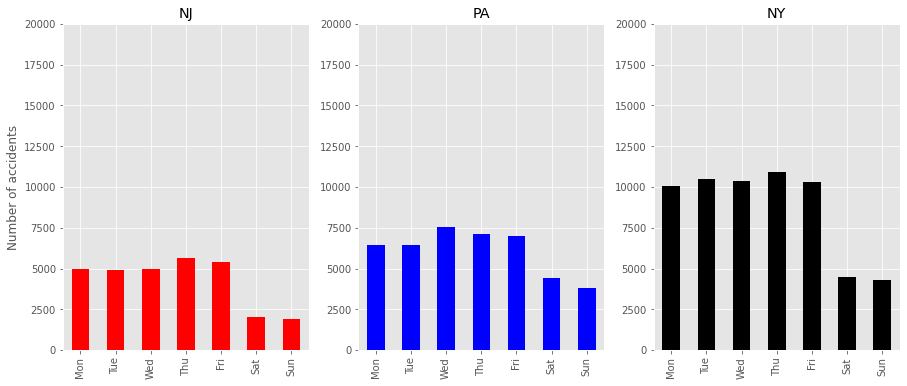

In [33]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY (for the whole dataset)
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar',color=color_lst[i]).set_title(state)
    plt.xlabel('')
    plt.ylim(0, 20000)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

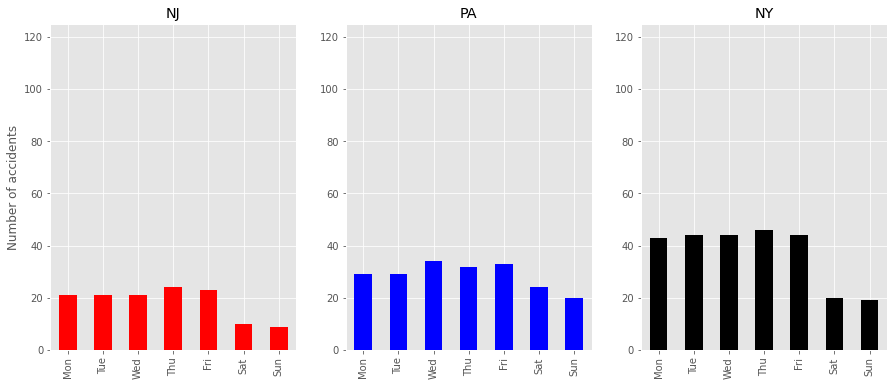

In [34]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Divide the total number of accidents by the number of unique days

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Remove xlabels
    plt.xlabel('')
    
    # Replace the xticks with weekday
    plt.xticks(np.arange(7),weekday_lst)
    
    # Set the limit of y axis
    plt.ylim(0, 125)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

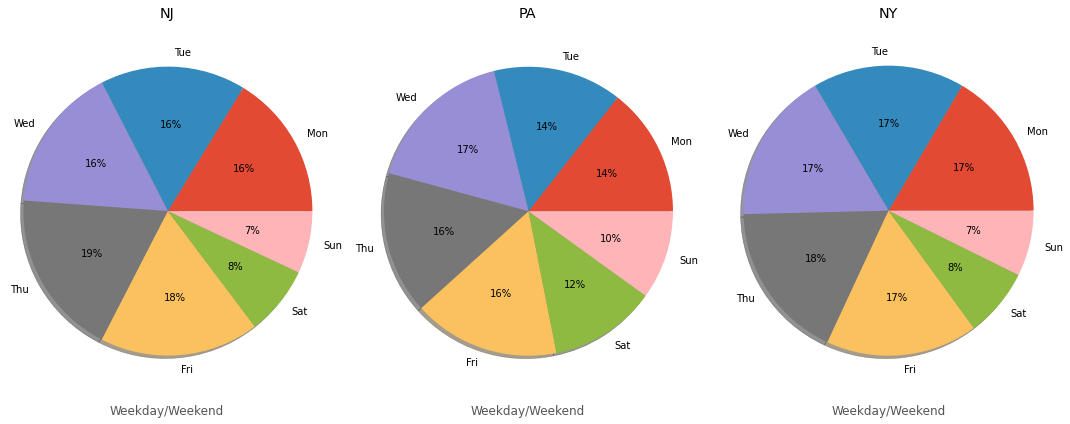

In [35]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Start_Weekday'
fig_x=len(state_lst)


# Divide the total number of accidents by the number of unique days

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    # df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)

        

plt.tight_layout()
plt.show()

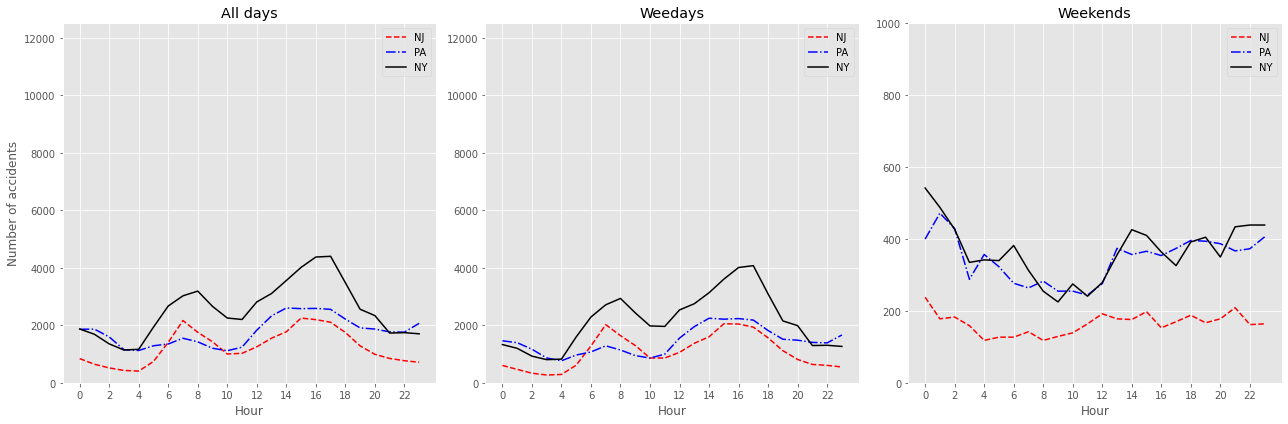

In [36]:
# Hourly distribution of accidents on all days, weekdays, & weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(18,6))

# Plot all data together

plt.subplot(1, 3, 1)

# Plot the states of New Jersey, Pennsylvania, & New York on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='NJ'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[df['State']=='PA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[df['State']=='NY'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of New Jersey, Pennsylvania, & New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
# Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
# Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 1000)
plt.legend(['NJ','PA','NY'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()